# **DEEP LEARNING ASSIGNMENT 1**
## Juan LONDONO
_______________

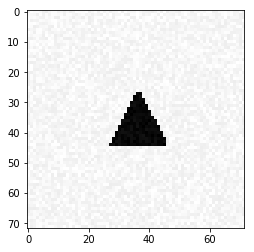

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import tensorflow as tf

# On some implementations of matplotlib, you may need to change this value
IMAGE_SIZE = 72

def generate_a_drawing(figsize, U, V, noise=0.0):
    fig = plt.figure(figsize=(figsize,figsize))
    ax = plt.subplot(111)
    plt.axis('Off')
    ax.set_xlim(0,figsize)
    ax.set_ylim(0,figsize)
    ax.fill(U, V, "k")
    fig.canvas.draw()
    imdata = np.frombuffer(fig.canvas.tostring_rgb(), dtype=np.uint8)[::3].astype(np.float32)
    imdata = imdata + noise * np.random.random(imdata.size)
    plt.close(fig)
    return imdata

def generate_a_rectangle(noise=0.0, free_location=False):
    figsize = 1.0    
    U = np.zeros(4)
    V = np.zeros(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise)


def generate_a_disk(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise)

def generate_a_triangle(noise=0.0, free_location=False):
    figsize = 1.0
    if free_location:
        U = np.random.random(3).reshape((1,-1))
        V = np.random.random(3).reshape((1,-1))
        ##sort vertices by increasing x in order to improve the regression outcomes
        vertices = np.concatenate((U,V),axis=0)
        vertices = vertices[:,vertices[0,:].argsort()]
        U = vertices[0]
        V = vertices[1]
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]]


im = generate_a_rectangle(10, True)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

im = generate_a_disk(10)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

[im, v] = generate_a_triangle(20, False)
plt.imshow(im.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')


def generate_dataset_classification(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def visualize_prediction(x, y):
    fig, ax = plt.subplots(figsize=(5, 5))
    I = x.reshape((IMAGE_SIZE,IMAGE_SIZE))
    ax.imshow(I, extent=[-0.15,1.15,-0.15,1.15],cmap='gray')
    ax.set_xlim([0,1])
    ax.set_ylim([0,1])

    xy = y.reshape(3,2)
    tri = patches.Polygon(xy, closed=True, fill = False, edgecolor = 'r', linewidth = 5, alpha = 0.5)
    ax.add_patch(tri)

    plt.show()

def generate_test_set_regression():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression(300, 20)
    return [X_test, Y_test]


# **1. SIMPLE CLASSIFICATION**

## Generating the training Data

In [2]:
#Let us set a Random Seed for sets generation
np.random.seed(42)

In [3]:
[X_train, Y_train] = generate_dataset_classification(300, 20)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


We want to turn our Y_train into a categorical variable -for optimization with categorical cross-entropy-. Each element of Y_train is turned into a vector that indicates the shape of the element.

In [4]:
from keras.utils import np_utils

Y_train_cat = np_utils.to_categorical(Y_train, 3)
print(Y_train_cat[0])

[0. 1. 0.]


Using TensorFlow backend.


## Creating a one-layer linear classifier, using SGD for optimization

In [205]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [210]:
nb_neurons = 3
input_dimension = X_train.shape[1]

model_sgd = Sequential()

model_sgd.add(Dense(nb_neurons, input_shape=(input_dimension,)))
model_sgd.add(Activation('softmax'))

Let us now use an SGD optimizer. We will try different parameters to test its predictions.
We will use the categorical cross-entropy as our loss function.

In [211]:
from keras.optimizers import SGD

sgd = SGD(lr=0.001, nesterov=True)
model_sgd.compile(loss='categorical_crossentropy', optimizer= sgd, metrics=['accuracy'])

model_sgd.fit(X_train, Y_train_cat,  epochs=100, batch_size=32, verbose = 1)

Epoch 1/100
300/300 [==============================] - 3s 10ms/step - loss: 1.1222 - acc: 0.4267
Epoch 2/100
300/300 [==============================] - 0s 208us/step - loss: 0.9545 - acc: 0.6033
Epoch 3/100
300/300 [==============================] - 0s 178us/step - loss: 0.9117 - acc: 0.6300
Epoch 4/100
300/300 [==============================] - 0s 208us/step - loss: 0.8281 - acc: 0.6400
Epoch 5/100
300/300 [==============================] - 0s 178us/step - loss: 0.8402 - acc: 0.6333
Epoch 6/100
300/300 [==============================] - 0s 230us/step - loss: 0.7488 - acc: 0.7467
Epoch 7/100
300/300 [==============================] - 0s 208us/step - loss: 0.7237 - acc: 0.7200
Epoch 8/100
300/300 [==============================] - 0s 230us/step - loss: 0.7111 - acc: 0.7233
Epoch 9/100
300/300 [==============================] - 0s 230us/step - loss: 0.6629 - acc: 0.7200
Epoch 10/100
300/300 [==============================] - 0s 208us/step - loss: 0.6115 - acc: 0.8567
Epoch 11/100
300/300

Testing the results for new centered images:

[[0. 0. 1.]]


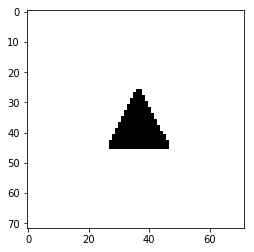

In [214]:
# Triangle
X_test_1 = generate_a_triangle()[0]
X_test_1 = X_test_1.reshape(1, X_test_1.shape[0])

plt.imshow(X_test_1.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

X_test_pred_1 = model_sgd.predict(X_test_1)
print(X_test_pred_1)

[[1. 0. 0.]]


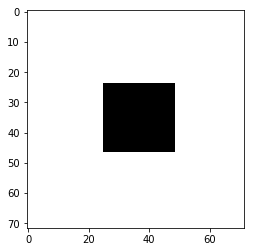

In [213]:
# Rectangle
X_test_2 = generate_a_rectangle()
X_test_2 = X_test_2.reshape(1, X_test_2.shape[0])

plt.imshow(X_test_2.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

X_test_pred_2 = model_sgd.predict(X_test_2)
print(X_test_pred_2)

[[0. 1. 0.]]


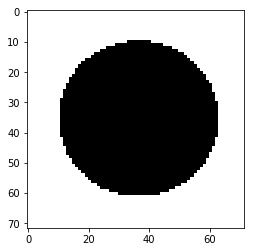

In [212]:
# Disc
X_test_3 = generate_a_disk()
X_test_3 = X_test_3.reshape(1, X_test_3.shape[0])

plt.imshow(X_test_3.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

X_test_pred_3 = model_sgd.predict(X_test_3)
print(X_test_pred_3)

### ***Results:***
Only the learning rate and the number of epochs were modified.

- With a lr=0.001 it takes approximately 100 epochs to reach 0.99 accuracy on the training set.
- With a lr=0.01 the model does not appear to converge.

When we test our model on new centered images, it predicts the correct shape.

## Creating a one-layer linear classifier, using Adam for optimization

In [11]:
nb_neurons = 3
input_dimension = X_train.shape[1]

model_adam = Sequential()

model_adam.add(Dense(nb_neurons, input_shape=(input_dimension,)))
model_adam.add(Activation('softmax'))

from keras.optimizers import Adam

adam = Adam(lr=0.001)
model_adam.compile(loss='categorical_crossentropy', optimizer= adam, metrics=['accuracy'])

model_adam.fit(X_train, Y_train_cat,  epochs=10, batch_size=32, verbose = 1)

Epoch 1/10
300/300 [==============================] - 0s 512us/step - loss: 1.3007 - acc: 0.4500
Epoch 2/10
300/300 [==============================] - 0s 156us/step - loss: 0.7901 - acc: 0.6500
Epoch 3/10
300/300 [==============================] - 0s 74us/step - loss: 0.5115 - acc: 0.8100
Epoch 4/10
300/300 [==============================] - 0s 156us/step - loss: 0.3965 - acc: 0.8767
Epoch 5/10
300/300 [==============================] - 0s 104us/step - loss: 0.3509 - acc: 0.8333
Epoch 6/10
300/300 [==============================] - 0s 126us/step - loss: 0.2768 - acc: 0.9233
Epoch 7/10
300/300 [==============================] - 0s 104us/step - loss: 0.2733 - acc: 0.9133
Epoch 8/10
300/300 [==============================] - 0s 126us/step - loss: 0.2581 - acc: 0.8867
Epoch 9/10
300/300 [==============================] - 0s 104us/step - loss: 0.2066 - acc: 0.9367
Epoch 10/10
300/300 [==============================] - 0s 104us/step - loss: 0.1993 - acc: 0.9400


Testing the results for new centered images:

[[0. 0. 1.]]


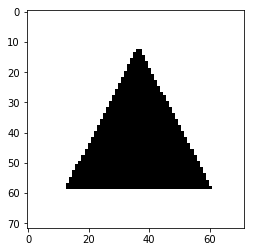

In [12]:
# Triangle
X_test_1 = generate_a_triangle()[0]
X_test_1 = X_test_1.reshape(1, X_test_1.shape[0])

plt.imshow(X_test_1.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

X_test_pred_1 = model_adam.predict(X_test_1)
print(X_test_pred_1)

[[0.9862585  0.01374149 0.        ]]


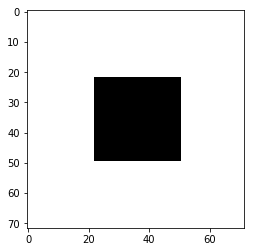

In [13]:
# Rectangle
X_test_2 = generate_a_rectangle()
X_test_2 = X_test_2.reshape(1, X_test_2.shape[0])

plt.imshow(X_test_2.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

X_test_pred_2 = model_adam.predict(X_test_2)
print(X_test_pred_2)

[[0. 1. 0.]]


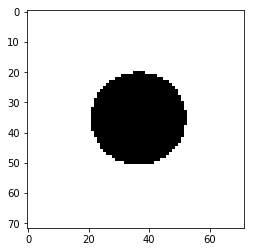

In [14]:
# Disc
X_test_3 = generate_a_disk()
X_test_3 = X_test_3.reshape(1, X_test_3.shape[0])

plt.imshow(X_test_3.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

X_test_pred_3 = model_adam.predict(X_test_3)
print(X_test_pred_3)

### ***Results:***
Only the learning rate and the number of epochs were modified.

- With a lr=0.001 it takes approximately **10** epochs to reach 0.99 accuracy on the training set.
- With a lr=0.01 the model does not appear to converge.

When we test our model on new centered images, it predicts the correct shape.

As we can see, the adam optimization method yields a much faster convergence rate than SGD.

## *Extra: Testing the model for uncentered images*
Out of curiosity, let us test the model on uncentered images by creating a dataset that uses the *generate_test_set_classification* function. The Y_test is already in categorical form.

In [216]:
[X_test, Y_test] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [217]:
model_sgd.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 230us/step


[1.8801166089375814, 0.276666667064031]

In [17]:
model_adam.evaluate(X_test, Y_test)

300/300 [==============================] - 0s 178us/step


[2.3893251927693684, 0.2733333337306976]

As expected, our model performs poorly ! It yields a 0.27 and 0.29 accuracy for sgd and adam respectively.
___________

# **2. VISUALIZING THE SOLUTION**

In [18]:
model_sgd.get_weights()[0].shape

(5184, 3)

We aim at visualizing the weights associated to each pixel, for each neuron. This will allows un to understand better which pixels  matter most in the classification task, for each shape.

In [19]:
rectangle_sgd = model_sgd.get_weights()[0][:,0]
disc_sgd = model_sgd.get_weights()[0][:,1]
triangle_sgd = model_sgd.get_weights()[0][:,2]

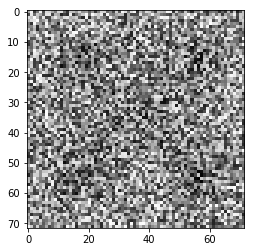

In [20]:
plt.imshow(rectangle_sgd.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

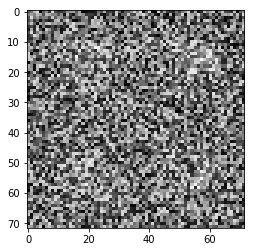

In [21]:
plt.imshow(disc_sgd.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

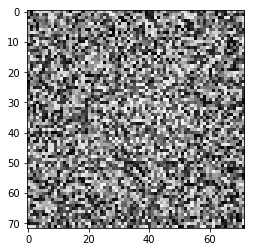

In [22]:
plt.imshow(triangle_sgd.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

Let us perform the same task for adam:

In [23]:
rectangle_adam = model_adam.get_weights()[0][:,0]
disc_adam = model_adam.get_weights()[0][:,1]
triangle_adam = model_adam.get_weights()[0][:,2]

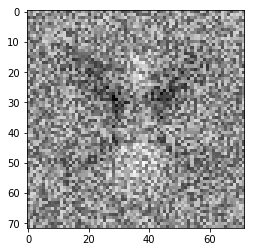

In [24]:
plt.imshow(rectangle_adam.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

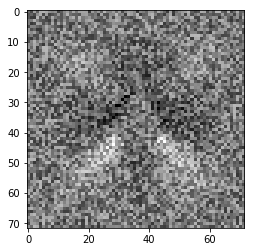

In [25]:
plt.imshow(disc_adam.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

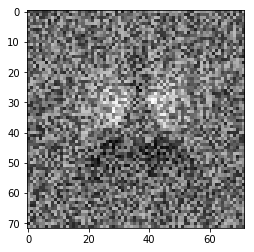

In [26]:
plt.imshow(triangle_adam.reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')

### ***Results:***

* **SGD:** no disinct shape is visible when plotting the weights of the linear classifier using a SGD optimization. It might be for this reason that the model generalises better with a set of uncentered images.

* **Adam:** We can clearly visualize 3 different shapes and shades for the 3 neurons that correspond to the distinct shapes.  
    - Rectangle: the pixels associated with the 4 corners of the rectangle are the ones with the highest weights (the darker ones). The presence of those 4 corners is the characteristic that differentiates best this shape from the others.
    - Disc: On the contrary, the weights of the neuron that classifies the disc sets its focus on the absence of those corners. Indeed, all the pixels surrounding the center of the circle have important weights, expect those that might correspond to the corners. This allows the model to distinguish between rectangles and discs.
    - Triangle: for the two previous neurons, we can see that the weights of the inferior parts of the shapes are lower that the ones of the upper parts. Indeed, the model gives strong weights to the pixels associated to the base of the triangle, and characterizes this shape by the absence of a filled area surrounding the top of the triangle.
____

# **3. UNCENTERED CLASSIFICATION**

### Generating uncentered shapes

In [27]:
# We will use a training set of 600 images for more precision
[X_train_hard, Y_train_hard] = generate_dataset_classification(600, 20, True)

[X_test_hard, Y_test_hard] = generate_test_set_classification()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [28]:
# Reshaping the X_train / X_test data to use in the Conv2D function
X_train_hard = X_train_hard.reshape(X_train_hard.shape[0], 72, 72, 1)

X_test_hard = X_test_hard.reshape(X_test_hard.shape[0], 72, 72, 1)

In [29]:
# Transforming Y_train into categorical data
Y_train_hard_cat = np_utils.to_categorical(Y_train_hard, 3)
print(Y_train_hard_cat[0])

[0. 0. 1.]


### Creating a convolutional model

I tried several types of models, by changing some parameters through successive steps:
- *Depth*: the best model with one convolutional layer yielded a train / test accuracy of 0.94 / 0.88. It was attained with a 16 neurons layer, since the 32 neurons layer lead to poor predictions.
- *Regularization*: as the previous tests seemed to overfit, I added a kernel regularization term (l2 norm) in the two dense layers. The train accuracy was reduced to 0.87.
- *Depth 2*: by increasing the depth up to two convolutional layers, the model yielded a train / test accuracy of 0.91 / 0.95. 

The folowing model corresponds to the one yielding the best results.

In [30]:
from keras.layers import Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras import regularizers

model_conv = Sequential()

model_conv.add(Conv2D(16, (5, 5), activation='relu', input_shape=(72, 72, 1)))
model_conv.add(MaxPooling2D(pool_size=(4, 4)))
# We use the dropout function to prevent overfitting
model_conv.add(Dropout(0.25))

model_conv.add(Conv2D(16, (5, 5), activation='relu'))
model_conv.add(MaxPooling2D(pool_size=(4, 4)))
model_conv.add(Dropout(0.25))

model_conv.add(Flatten())
model_conv.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))
model_conv.add(Dropout(0.5))
model_conv.add(Dense(3, activation='softmax', kernel_regularizer=regularizers.l2(0.01)))

In [31]:
from keras.optimizers import Adam

adam = Adam(lr=0.01, decay = 1e-06 )
model_conv.compile(loss='categorical_crossentropy', optimizer=adam, metrics=['accuracy'])

model_conv.fit(X_train_hard, Y_train_hard_cat, batch_size=32, epochs=30, verbose=1)

Epoch 1/30
600/600 [==============================] - 2s 3ms/step - loss: 1.5609 - acc: 0.3783
Epoch 2/30
600/600 [==============================] - 1s 2ms/step - loss: 1.1563 - acc: 0.4967
Epoch 3/30
600/600 [==============================] - 1s 2ms/step - loss: 1.0223 - acc: 0.5500
Epoch 4/30
600/600 [==============================] - 1s 2ms/step - loss: 0.9322 - acc: 0.6117
Epoch 5/30
600/600 [==============================] - 1s 2ms/step - loss: 0.9632 - acc: 0.6100
Epoch 6/30
600/600 [==============================] - 1s 2ms/step - loss: 0.9147 - acc: 0.6300
Epoch 7/30
600/600 [==============================] - 1s 2ms/step - loss: 0.8545 - acc: 0.6550
Epoch 8/30
600/600 [==============================] - 1s 2ms/step - loss: 0.6964 - acc: 0.7800
Epoch 9/30
600/600 [==============================] - 1s 2ms/step - loss: 0.6960 - acc: 0.7617
Epoch 10/30
600/600 [==============================] - 1s 2ms/step - loss: 0.6066 - acc: 0.8200
Epoch 11/30
600/600 [============================

In [32]:
model_conv.evaluate(X_test_hard, Y_test_hard)

300/300 [==============================] - 0s 1ms/step


[0.31808743357658387, 0.9466666674613953]

# **4. REGRESSION PROBLEM**

In [219]:
[X_train_reg, Y_train_reg] = generate_dataset_regression(300, 20)
[X_test_reg, Y_test_reg] = generate_test_set_regression()

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


In [220]:
# Reshaping the X_train / X_test data to use in the Conv2D function
X_train_reg = X_train_reg.reshape(X_train_reg.shape[0], 72, 72, 1)

X_test_reg = X_test_reg.reshape(X_test_reg.shape[0], 72, 72, 1)

With normalization, the model did not appear to converge. Therefore, I decided to train the following CNN without normalizing the expected output.

In [221]:
from keras.layers.normalization import BatchNormalization

model_reg = Sequential()

model_reg.add(Conv2D(16, (3, 3), activation='relu', input_shape=(72, 72, 1)))
model_reg.add(MaxPooling2D(pool_size=(2, 2)))

model_reg.add(Conv2D(16, (3, 3), activation='relu'))
model_reg.add(MaxPooling2D(pool_size=(2, 2)))

model_reg.add(Flatten())
model_reg.add(Dense(32, activation='relu'))
model_reg.add(Dropout(0.5))
model_reg.add(Dense(6))


In [223]:
model_reg.compile(loss='mean_squared_error', optimizer='adam')

model_reg.fit(X_train_reg, Y_train_reg, batch_size=32, epochs=30, verbose=1)

Epoch 1/30
300/300 [==============================] - 4s 14ms/step - loss: 0.1089
Epoch 2/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0970
Epoch 3/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0934
Epoch 4/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0917
Epoch 5/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0828
Epoch 6/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0804
Epoch 7/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0772
Epoch 8/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0813
Epoch 9/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0764
Epoch 10/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0851
Epoch 11/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0775
Epoch 12/30
300/300 [==============================] - 1s 2ms/step - loss: 0.0722
Epoch 13/30
300/300 [===

In [224]:
model_reg.evaluate(X_test_reg, Y_test_reg)

300/300 [==============================] - 2s 6ms/step


0.04080100471774737

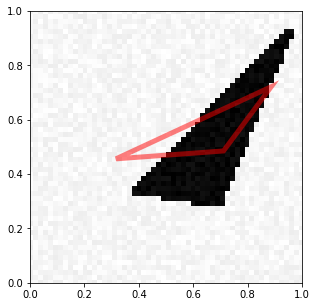

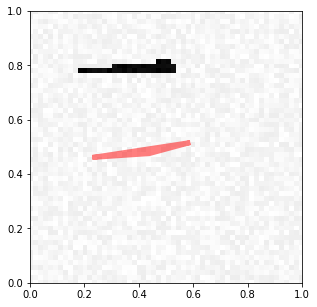

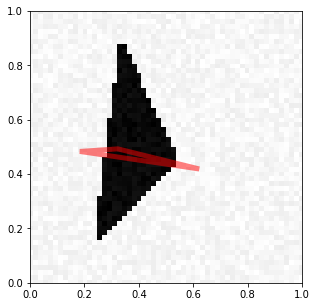

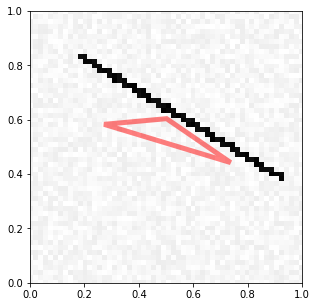

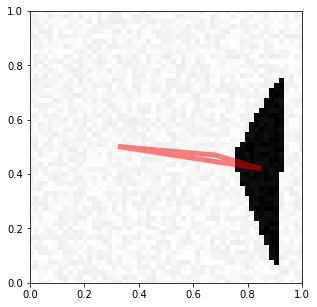

In [228]:
for i in range(5):
    Y_test_pred = model_reg.predict(X_test_reg)
    visualize_prediction(X_test_reg[i], Y_test_pred[i])

# **5. DENOISING AN IMAGE**

First, let us create new functions to generate images with noise, for our model to denoise.
We introduced random noise with the following function: random.randint(200,600).

In [169]:
import random

def generate_a_rectangle2(free_location=False):
    figsize = 1.0
    noise=random.randint(200,600)
    U = np.zeros(4)
    V = np.zeros(4)
    corners = np.random.random(4)
    if free_location:
        corners = np.random.random(4)
        top = max(corners[0], corners[1])
        bottom = min(corners[0], corners[1])
        left = min(corners[2], corners[3])
        right = max(corners[2], corners[3])
    else:
        side = (0.3 + 0.7 * np.random.random()) * figsize
        top = figsize/2 + side/2
        bottom = figsize/2 - side/2
        left = bottom
        right = top
    side = (0.3 + 0.7 * np.random.random()) * figsize
    top = figsize/2 + side/2
    bottom = figsize/2 - side/2
    left = bottom
    right = top
    U[0] = U[1] = top
    U[2] = U[3] = bottom
    V[0] = V[3] = left
    V[1] = V[2] = right
    return generate_a_drawing(figsize, U, V, noise),generate_a_drawing(figsize, U, V)


def generate_a_disk2(free_location=False):
    figsize = 1.0
    noise=random.randint(200,600)
    if free_location:
        center = np.random.random(2)
    else:
        center = (figsize/2, figsize/2)
    radius = (0.3 + 0.7 * np.random.random()) * figsize/2
    N = 50
    U = np.zeros(N)
    V = np.zeros(N)
    i = 0
    for t in np.linspace(0, 2*np.pi, N):
        U[i] = center[0] + np.cos(t) * radius
        V[i] = center[1] + np.sin(t) * radius
        i = i + 1
    return generate_a_drawing(figsize, U, V, noise),generate_a_drawing(figsize, U, V)

def generate_a_triangle2(free_location=False):
    figsize = 1.0
    noise=random.randint(200,600)
    if free_location:
        U = np.random.random(3).reshape((1,-1))
        V = np.random.random(3).reshape((1,-1))
        ##sort vertices by increasing x in order to improve the regression outcomes
        vertices = np.concatenate((U,V),axis=0)
        vertices = vertices[:,vertices[0,:].argsort()]
        U = vertices[0]
        V = vertices[1]
    else:
        size = (0.3 + 0.7 * np.random.random())*figsize/2
        middle = figsize/2
        U = (middle, middle+size, middle-size)
        V = (middle+size, middle-size, middle-size)
    imdata = generate_a_drawing(figsize, U, V, noise)
    return [imdata, [U[0], V[0], U[1], V[1], U[2], V[2]]],[generate_a_drawing(figsize, U, V), [U[0], V[0], U[1], V[1], U[2], V[2]]]


def generate_dataset_classification2(nb_samples, noise=0.0, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros(nb_samples)
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i] = generate_a_rectangle2(noise, free_location)
        elif category == 1: 
            X[i] = generate_a_disk2(noise, free_location)
        else:
            [X[i], V] = generate_a_triangle2(noise, free_location)
        Y[i] = category
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

def generate_test_set_classification2():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_classification(300, 20, True)
    Y_test = np_utils.to_categorical(Y_test, 3) 
    return [X_test, Y_test]

def generate_dataset_regression2(nb_samples, noise=0.0):
    # Getting im_size:
    im_size = generate_a_triangle()[0].shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples, 6])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        [X[i], Y[i]] = generate_a_triangle2(noise, True)
    X = (X + noise) / (255 + 2 * noise)
    return [X, Y]

import matplotlib.patches as patches

def generate_test_set_regression2():
    np.random.seed(42)
    [X_test, Y_test] = generate_dataset_regression2(300, 20)
    return [X_test, Y_test]


def generate_data_with_noise(nb_samples, free_location=False):
    # Getting im_size:
    im_size = generate_a_rectangle().shape[0]
    X = np.zeros([nb_samples,im_size])
    Y = np.zeros([nb_samples,im_size])
    print('Creating data:')
    for i in range(nb_samples):
        if i % 10 == 0:
            print(i)
        category = np.random.randint(3)
        if category == 0:
            X[i], Y[i] = generate_a_rectangle2(free_location)
        elif category == 1: 
            X[i], Y[i] = generate_a_disk2(free_location)
        else:
            [X[i], V],[Y[i], U] = generate_a_triangle2(free_location)
    return [X, Y]

We selected a U-Net model with 6 instances.

In [185]:
from keras.layers import Input, UpSampling2D
from keras.models import Model
from keras.models import *
from keras.layers import *
from keras.optimizers import *

inputs = Input((72,72,1))

conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(inputs)
conv1 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv1)
pool1 = MaxPooling2D(pool_size=(2, 2))(conv1)

conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool1)
conv2 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv2)
pool2 = MaxPooling2D(pool_size=(2, 2))(conv2)

conv3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(pool2)
conv3 = Conv2D(128, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv3)

up4 = concatenate([Conv2DTranspose(64, (2,2), strides = (2,2), padding = 'same')(conv3), conv2], axis=3)
conv4 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up4)
conv4 = Conv2D(64, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv4)

up5 = concatenate([Conv2DTranspose(32, (2,2), strides = (2,2), padding = 'same')(conv4), conv1], axis=3)
conv5 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(up5)
conv5 = Conv2D(32, 3, activation = 'relu', padding = 'same', kernel_initializer = 'he_normal')(conv5)

conv6 = Conv2D(1, 1)(conv5)

model_noise = Model(inputs = inputs, outputs = conv6)

model_noise.compile(optimizer = 'adam', loss = 'mean_squared_error')

model.summary()

__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_10 (InputLayer)           (None, 72, 72, 1)    0                                            
__________________________________________________________________________________________________
conv2d_179 (Conv2D)             (None, 72, 72, 32)   320         input_10[0][0]                   
__________________________________________________________________________________________________
conv2d_180 (Conv2D)             (None, 72, 72, 32)   9248        conv2d_179[0][0]                 
__________________________________________________________________________________________________
max_pooling2d_63 (MaxPooling2D) (None, 36, 36, 32)   0           conv2d_180[0][0]                 
__________________________________________________________________________________________________
conv2d_181

In [176]:
# Generating the new dataset
[X_train_noise, Y_train_noise] = generate_data_with_noise(600, free_location=False)
[X_test_noise, Y_test_noise] = generate_data_with_noise(300, free_location=False)

# Reshaping the X_train / X_test data to use in the Conv2D function
X_train_noise = X_train_noise.reshape(X_train_noise.shape[0], 72, 72, 1)
Y_train_noise = Y_train_noise.reshape(X_train_noise.shape[0], 72, 72, 1)

X_test_noise = X_test_noise.reshape(X_test_noise.shape[0], 72, 72, 1)
Y_test_noise = Y_test_noise.reshape(X_test_noise.shape[0], 72, 72, 1)

Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290
300
310
320
330
340
350
360
370
380
390
400
410
420
430
440
450
460
470
480
490
500
510
520
530
540
550
560
570
580
590
Creating data:
0
10
20
30
40
50
60
70
80
90
100
110
120
130
140
150
160
170
180
190
200
210
220
230
240
250
260
270
280
290


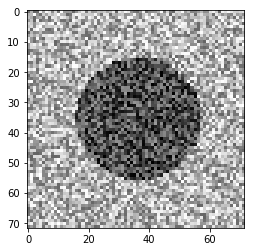

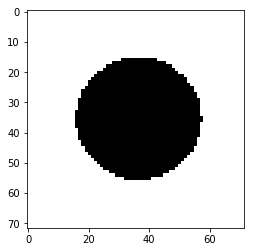

In [186]:
# Generating examples
i=random.randint(0,601)
plt.imshow(X_train_noise[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()
plt.imshow(Y_train_noise[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
plt.show()

In [189]:
model_noise.fit(X_train_noise, Y_train_noise, batch_size=32, epochs=30, verbose=1)

Epoch 1/30
600/600 [==============================] - 58s 96ms/step - loss: 240.5707
Epoch 2/30
600/600 [==============================] - 79s 132ms/step - loss: 242.4172
Epoch 3/30
600/600 [==============================] - 84s 140ms/step - loss: 233.5759
Epoch 4/30
600/600 [==============================] - 87s 145ms/step - loss: 229.5973
Epoch 5/30
600/600 [==============================] - 79s 131ms/step - loss: 210.8240
Epoch 6/30
600/600 [==============================] - 78s 131ms/step - loss: 214.7095
Epoch 7/30
600/600 [==============================] - 43s 72ms/step - loss: 207.0048
Epoch 8/30
600/600 [==============================] - 45s 74ms/step - loss: 201.5102
Epoch 9/30
600/600 [==============================] - 45s 76ms/step - loss: 205.3975
Epoch 10/30
600/600 [==============================] - 47s 78ms/step - loss: 188.4722
Epoch 11/30
600/600 [==============================] - 48s 80ms/step - loss: 198.6654
Epoch 12/30
600/600 [==============================] - 49s

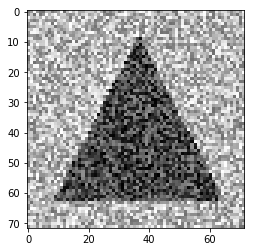

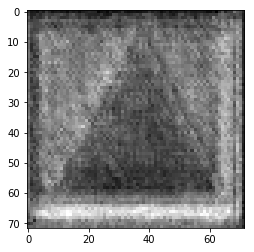

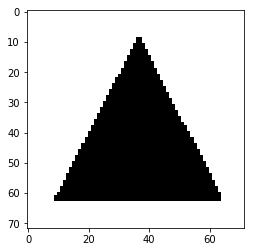

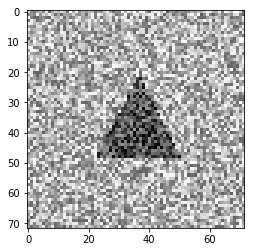

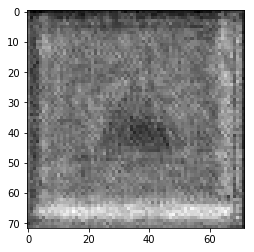

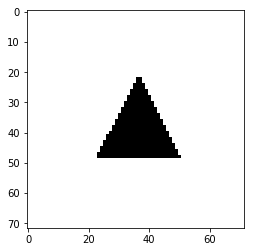

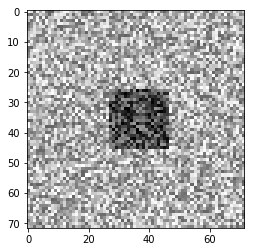

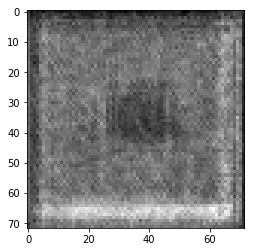

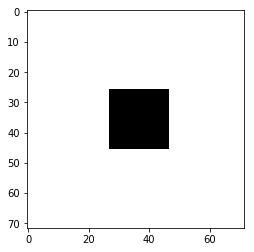

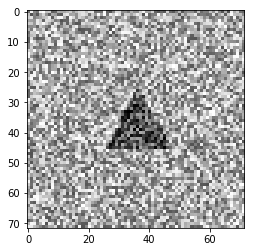

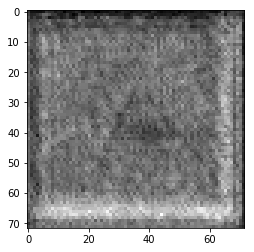

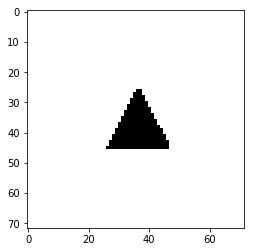

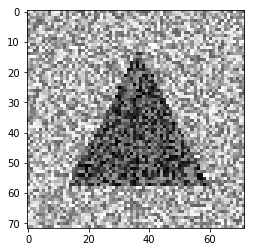

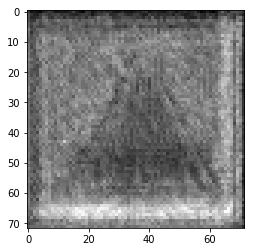

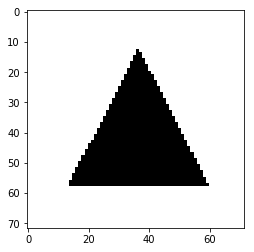

In [191]:
Y_train_pred=model.predict(X_train_noise)

for j in range(5):
    i= np.random.randint(0,601)
   
    plt.imshow(X_train_noise[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
    plt.show()
    plt.imshow(Y_train_pred[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
    plt.show()
    plt.imshow(Y_train_noise[i].reshape(IMAGE_SIZE,IMAGE_SIZE), cmap='gray')
    plt.show()

The model appears to converge, even if the loss is still high. The output appears blury, with high noise, but the shape can be distinguished.

We would need more epochs to add precision to our model.